Eigenvalues: [4.20438706 0.24314579]
Eigenvectors:
 [[-0.36263433  0.6558202 ]
 [ 0.08122848  0.73001455]
 [-0.85629752 -0.17703033]
 [-0.35868209 -0.07509244]]
-------------------------------------------------------------------


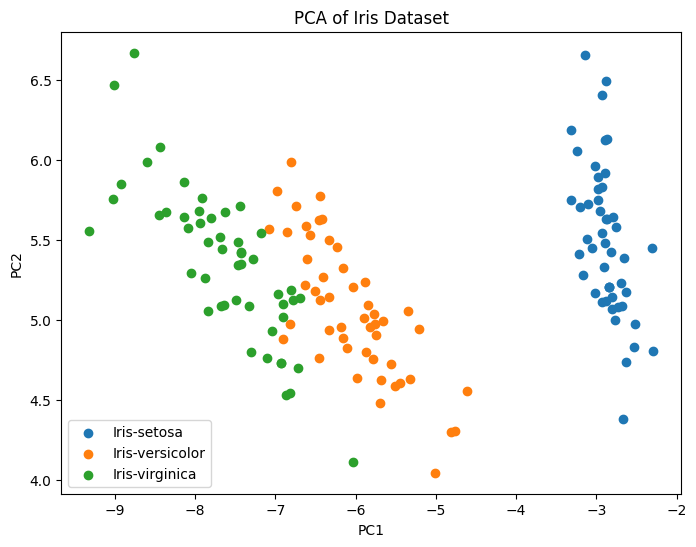

------------------------------------------------------------------
Explained variance ratio: [0.92395437 0.05343362]
-----------------------------------------------------------------------


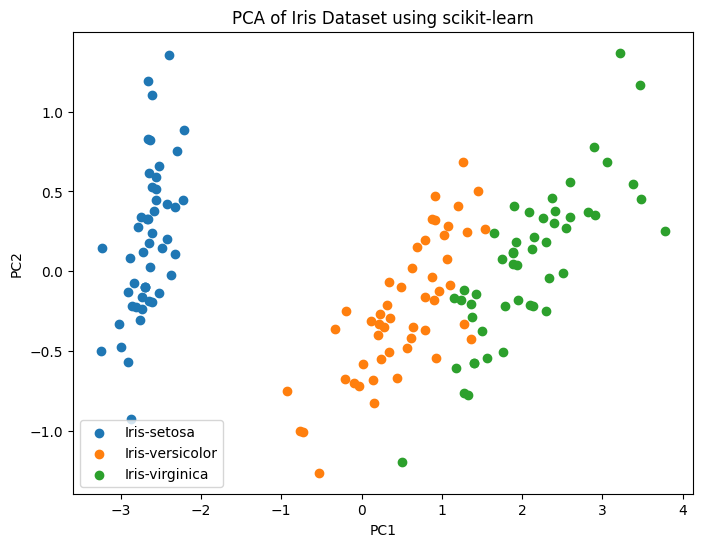

-----------------------------------------------------------------------
Correlation between PC1 from manual implementation and scikit-learn: -1.0
Correlation between PC2 from manual implementation and scikit-learn: 1.0


In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/sample_data/iris [ Machine Learning Assignment 2 ].csv')

X = data.iloc[:,0:4]

Y = data.iloc[:,4]

X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]

cov_matrix = np.cov(X.T)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Choose the two largest eigenvalues and their corresponding eigenvectors
eigval_set = eigenvalues[:2]
eigvec_set = eigenvectors[:, :2]

print("Eigenvalues:", eigval_set)
print("Eigenvectors:\n", eigvec_set)

print('-------------------------------------------------------------------')


# 2) Visualization of PCA

import matplotlib.pyplot as plt

pca_X = np.dot(eigvec_set.transpose(), X.transpose()).transpose()

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    plt.scatter(pca_X[Y == target_name, 0], pca_X[Y == target_name, 1], label=target_name)

plt.title('PCA of Iris Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()


print('------------------------------------------------------------------')

# 3) Implement pca using sklearn and iris data.


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

pca_X_sklearn = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)

print('-----------------------------------------------------------------------')

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    plt.scatter(pca_X_sklearn[Y == target_name, 0], pca_X_sklearn[Y == target_name, 1], label=target_name)

plt.title('PCA of Iris Dataset using scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

print('-----------------------------------------------------------------------')


print("Correlation between PC1 from manual implementation and scikit-learn:", np.corrcoef(pca_X[:, 0], pca_X_sklearn[:, 0])[0, 1])
print("Correlation between PC2 from manual implementation and scikit-learn:", np.corrcoef(pca_X[:, 1], pca_X_sklearn[:, 1])[0, 1])
